## Writeback vs Write-through strategy

Here we are comparing write back write allocate with write through no write allocate, results can be seen at the bottom of the page

In [73]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np
from glob import glob

results = {}
tempList = []
strategies = ['WB', 'WT']
for strategy in strategies:
    for f_name in glob('../cache_config/results/WB_WT_Comparaison/' + strategy + '/*.json'):
        with open('../cache_config_/' + f_name) as f:
            tempList.append(json.load(f))
    results[strategy] = copy.deepcopy(tempList)
    tempList = []

In [76]:
def average(results, keyword):
    avrg = 0    
    for result in results:
        avrg += result[keyword]
        
    return avrg / len(results)
    

# Define the name of the variables of interest
interest_var = ['amat', 'amat_read', 'amat_write']
amat_results = {}

for var in interest_var:
    amat_results[var] = []
    for strategy in strategies:
        amat_results[var].append(average(results[strategy], var))
    amat_results[var] = tuple(amat_results[var])

amat values:
	amat_WB = 13.927536231884057 cycles
	amat_WT = 14.253623188405799 cycles

amat_read values:
	amat_read_WB = 13.645357686453577 cycles
	amat_read_WT = 11.704718417047184 cycles

amat_write values:
	amat_write_WB = 19.545454545454547 cycles
	amat_write_WT = 65.0 cycles



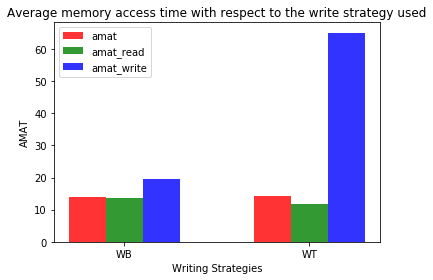

In [77]:
# data to plot
n_groups = len(strategies)
colors = ['r', 'g', 'b']
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

count = 0
for var in interest_var:
    print(var + " values:")
    for strategy in strategies:
        print('\t' + var + '_' + strategy + " = " + str(amat_results[var][strategies.index(strategy)]) + ' cycles')
    plt.bar(index + count * bar_width, amat_results[var], bar_width,
        alpha=opacity,
        color=colors[count],
        label=var)
    count += 1
    print()

plt.xlabel('Writing Strategies')
plt.ylabel('AMAT')
plt.title('Average memory access time with respect to the write strategy used')
plt.xticks(index + bar_width, strategies)
plt.legend()
 
plt.tight_layout()
plt.show()